In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [6]:
# versions

print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.5.3
numpy==1.24.2
seaborn==0.12.2


In [7]:
# import the data prepared in ERF_get_data_prereg

df = pd.read_csv('...')

list_survey = pd.read_csv('...')

# limit to taxonomists only

df = df.loc[df['taxonomist?'] == 'taxonomist']

# drop cases that haven't filled in any of the agree's

df = df.loc[(df.c1_agree != 'No response') |(df.c2_agree != 'No response') |(df.c3_agree != 'No response')]

In [8]:
len(df)

447

# Variables and categories used for the analysis

In [9]:
demo = ['taxonomist?', 'professional',
        'specialization', 'broad_reader', 'experience', 'species_concepts']
agree = ['c1_agree', 'c2_agree','c3_agree']
accept = ['c1_accept','c2_accept','c3_accept']
cases = ['condition_c1','condition_c2','condition_c3']

# dictionary for titles
q_dct = {'condition_c1': 'Condition plant case','condition_c2':'Condition frog case','condition_c3':'Condition flatworm case',
        'c1_agree':'Agreement plant case','c2_agree':'Agreement frog case','c3_agree':'Agreement flatworm case'}



# General Survey Info


In [10]:
#respons rate', mean and median duration

print(f'Mean duration: {round((df.duration.mean() / 60),2)} minutes')
print(f'Median duration: {round((df.duration.median() / 60),2)} minutes')


Mean duration: 51.08 minutes
Median duration: 8.42 minutes


In [11]:
# duration of the survey

df.duration.describe()

count       447.000000
mean       3064.753915
std       19874.330837
min         151.000000
25%         356.000000
50%         505.000000
75%         740.500000
max      293142.000000
Name: duration, dtype: float64

In [12]:
#check the high values for duration

print(' longest durations:')
print('')

print((df.duration.sort_values().tail()))

df.loc[df.duration > 10000]

 longest durations:

157    104756
670    130131
491    155288
611    181301
527    293142
Name: duration, dtype: int32


,Status,duration,Finished,taxonomist?,professional,specialization,broad_reader,experience,EW,Q41,start,end,main_data,condition_c1,c1_agree,c1_accept,condition_c2,c2_agree,c2_accept,c2_lack_morph,c2_lack_dna,c2_lack_hab,c2_lack_other,condition_c3,c3_agree,c3_accept,species_concepts,SC_full,continent,least_developed,low_income
93,0,12869,1,taxonomist,pro,Fungi,very often,21-30,1,NaN,2022-09-15 14:05:19,2022-09-15 17:39:49,1,Neutral,no,no,Habitat,yes,yes,NaN,NaN,0,NaN,Neutral,yes,yes,PSCmono,PSCmono,Europe,0,0
157,0,104756,1,taxonomist,pro,Insects,rarely,11-20,1,NaN,2022-09-19 03:11:31,2022-09-20 08:17:28,1,Abundant,no,yes,Habitat,yes,yes,NaN,NaN,0,NaN,Gene flow,no,yes,BSC,BSC,Asia,0,1
194,0,19644,1,taxonomist,pro,Insects,once in a while,11-20,1,NaN,2022-09-20 21:28:41,2022-09-21 02:56:05,1,Threatened,no,yes,Morphology,yes,yes,0,NaN,NaN,NaN,Neutral,yes,yes,ESC,ESC,South America,0,1
216,0,24563,1,taxonomist,pro,Insects,rarely,6-10,1,I think no single species concept fits all cas...,2022-09-21 04:25:27,2022-09-21 11:14:51,1,Abundant,yes,yes,Morphology,yes,yes,0,NaN,NaN,NaN,Gene flow,no,yes,PSCdia,PSCdia,Africa,0,1
330,0,26127,1,taxonomist,pro,Insects,once in a while,0-5,1,NaN,2022-09-23 04:02:56,2022-09-23 11:18:23,1,Neutral,no,no,Morphology,no,no,0,1,NaN,Frog mating calls can also be used as addition...,Gene flow,yes,no,other,other,Asia,0,1
336,0,10716,1,taxonomist,pro,Algae,rarely,21-30,1,NaN,2022-09-23 10:43:38,2022-09-23 13:42:14,1,Neutral,no,yes,Neutral,no,yes,1,1,1,NaN,Gene flow,yes,yes,BSC,BSC,Europe,0,0
491,0,155288,1,taxonomist,pro,Mammals,once in a while,0-5,1,NaN,2022-10-03 14:19:55,2022-10-05 09:28:04,1,Neutral,no,no,Habitat,yes,yes,NaN,NaN,0,NaN,No gene flow,yes,yes,ESC,ESC,Europe,0,0
527,0,293142,1,taxonomist,pro,Plants,very often,11-20,1,"In answering those question, I hoped to see in...",2022-10-02 03:50:59,2022-10-05 13:16:42,1,Neutral,no,yes,Neutral,no,no,1,1,1,NaN,Gene flow,yes,yes,ESC,ESC,Asia,0,1
581,0,83327,0,taxonomist,pro,Plants,rarely,11-20,1,NaN,2022-10-02 07:48:17,2022-10-03 06:57:04,1,Neutral,no,yes,DNA,yes,yes,NaN,0,NaN,NaN,No gene flow,yes,yes,BSC,BSC,Asia,0,1
611,0,181301,0,taxonomist,amateur,Prokaryotes,once in a while,31+,1,NaN,2022-10-05 11:53:14,2022-10-07 14:14:56,1,No response,No response,No response,DNA,no,NaN,NaN,0,NaN,NaN,No response,No response,No response,NaN,No response,Europe,0,0


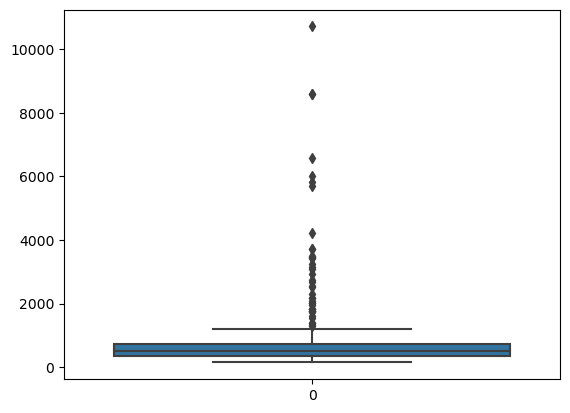

In [13]:
#plot the response times below 3 hours

duration_times = df.loc[df.duration < 10800]['duration'].copy()
sns.boxplot(data=duration_times.values)
plt.show()

In [14]:
#number of responses

print(f'total number of responses included: {len(df)}')
print(f'total number of responses included for preregistered hypotheses: {len(df.loc[df.main_data == 1])}')


total number of responses included: 447
total number of responses included for preregistered hypotheses: 396


In [15]:
# number of responses per condition ('no response' will be dropped for the hypothesis tests)

df[['condition_c1','condition_c2', 'condition_c3']].apply(pd.Series.value_counts).stack().reset_index().sort_values(by = 0, ascending = False)

,level_0,level_1,0
7,Neutral,condition_c3,155.0
12,Threatened,condition_c1,151.0
0,Abundant,condition_c1,145.0
5,Neutral,condition_c1,143.0
8,No gene flow,condition_c3,141.0
2,Gene flow,condition_c3,139.0
6,Neutral,condition_c2,119.0
3,Habitat,condition_c2,110.0
4,Morphology,condition_c2,107.0
1,DNA,condition_c2,105.0


# Missing data

In [16]:
# check for nans (including e.g. non obligatory text columns)

print(f'total cells: {df.size}')
print(f'proportion of NaNs in full dataframe (including dummies for mcqs): {round((df.isna().sum().sum()/ (df.size)),3)}')

total cells: 13857
proportion of NaNs in full dataframe (including dummies for mcqs): 0.109


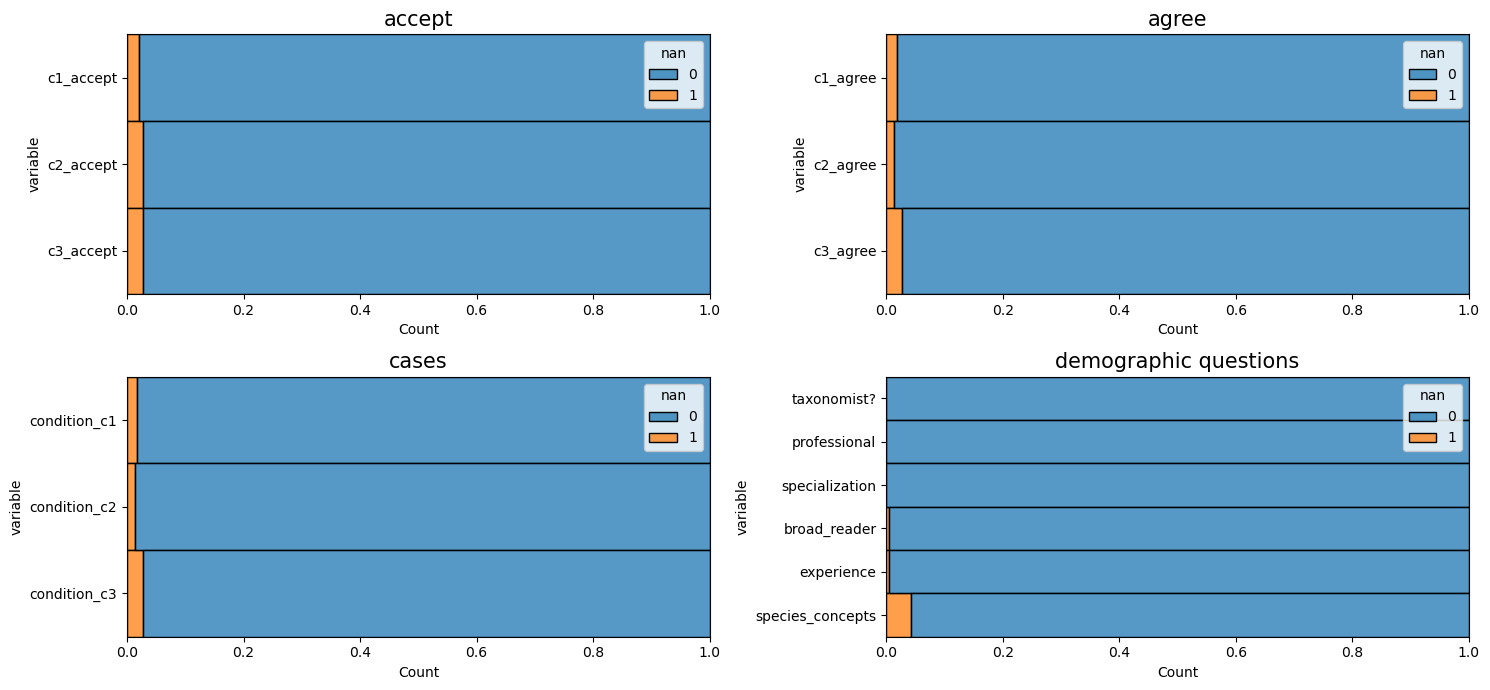

In [17]:
# missing data for demographic questions and for all of the response roles
# the graphs gave the nans within each role -- these are real missing data
# proportion in the plot title is proportion of nans

accepts = df[accept]
accepts.name = 'accept'

agrees = df[agree]
agrees.name = 'agree'

cases_df = df[cases]
cases_df.name='cases'

df_demo = df[demo]
df_demo.name = 'demographic questions'

fig, axs = plt.subplots(2,2, figsize = (15,7) )

for ax,dfx in zip(axs.flat, [accepts, agrees, cases_df ,df_demo] ):
    a = dfx.melt(value_name="missing")
    a['nan'] = np.where((a.missing == 'No response') | (a.missing.isnull()),1,0)
    sns.histplot(
      data=a,
      y="variable",
      hue="nan",
      multiple="fill",
      ax=ax
    )
    
    ax.set_title(str(dfx.name), fontsize=15)


fig.tight_layout()




In [18]:
# check species concepts

len(df.loc[df.species_concepts.isna()])

19

In [19]:
#total count of nans, i.e. including nans because participants couldn't choose an option for 'lacking'

pd.set_option('display.max_columns', None)

print('NaN per question')

pd.DataFrame(df.isna().sum(), columns = ['nubmer of nans']).T

NaN per question


,Status,duration,Finished,taxonomist?,professional,specialization,broad_reader,experience,EW,Q41,start,end,main_data,condition_c1,c1_agree,c1_accept,condition_c2,c2_agree,c2_accept,c2_lack_morph,c2_lack_dna,c2_lack_hab,c2_lack_other,condition_c3,c3_agree,c3_accept,species_concepts,SC_full,continent,least_developed,low_income
nubmer of nans,0,0,0,0,0,0,2,2,0,326,0,0,0,0,0,1,0,0,6,235,247,288,381,0,0,0,19,0,0,0,0


# responses per condition

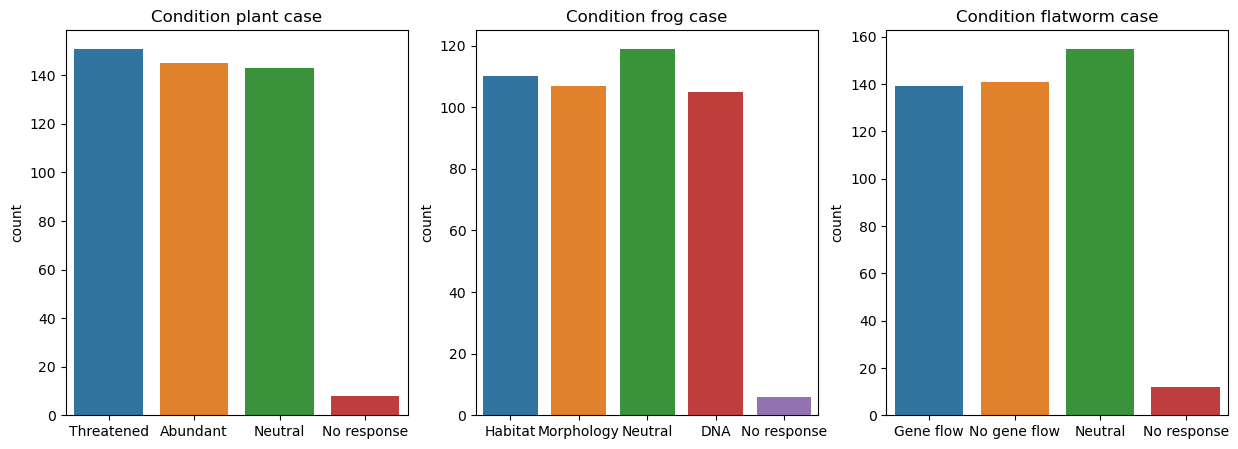

In [20]:
fig, axs = plt.subplots(ncols = 3, figsize = (15,5))

for ax,i in zip(axs.flat, cases):
    sns.countplot(data = df, x =i, ax=ax)
    ax.set_title(q_dct[i])
    ax.set_xlabel('')

# Profile respondents

## General Demographic variables

In [21]:
import matplotlib.colors as mcolors



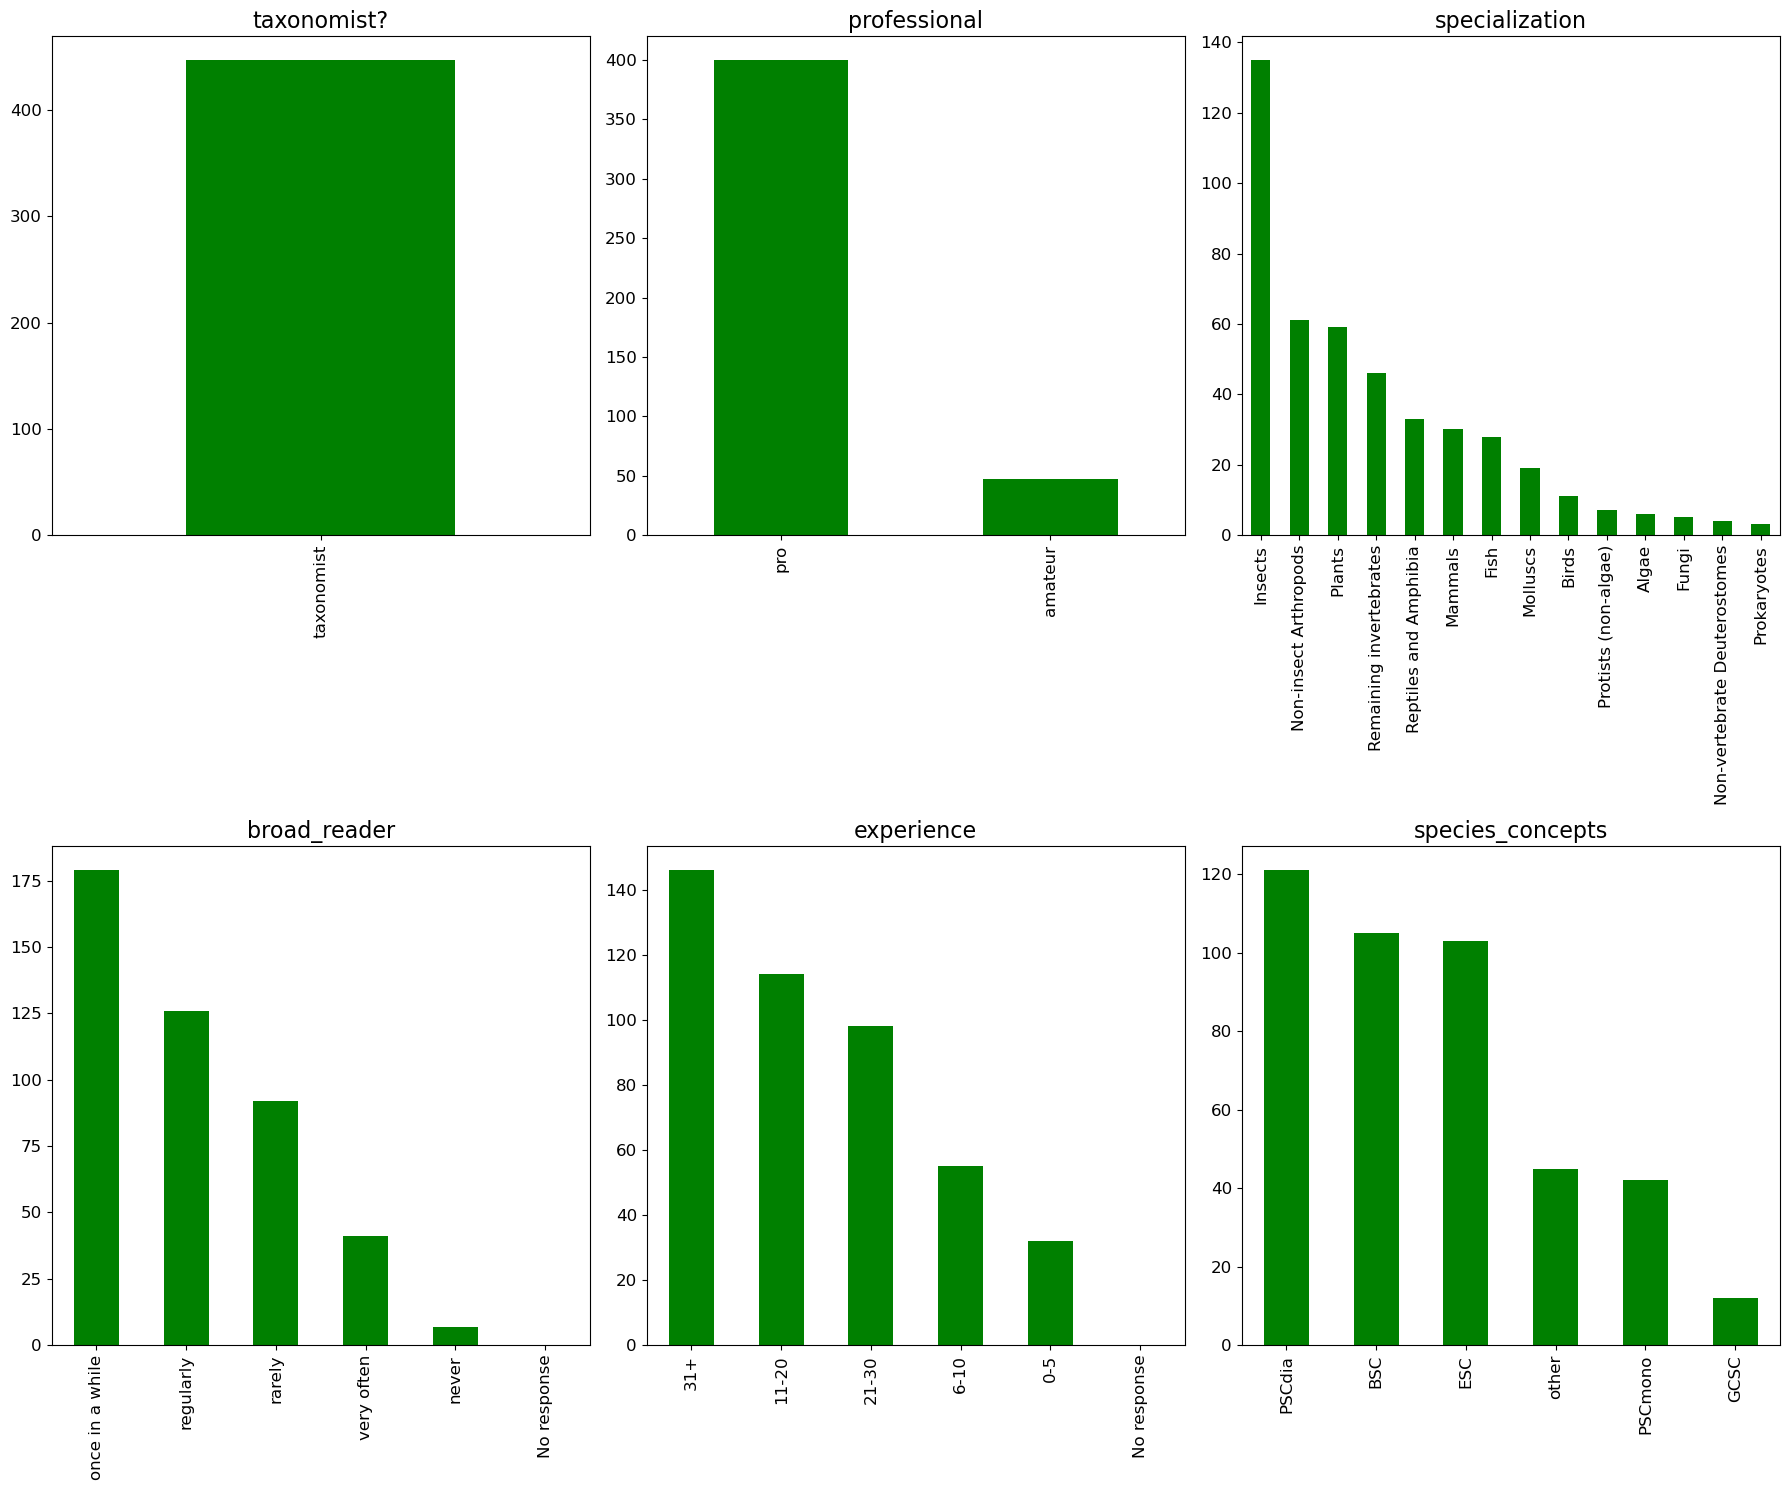

In [22]:
#check counts for roles,fields, seniority, location
# 'taxonomist' should be 100% as we limited the dataset to those who identify as taxonomists

fig, axs = plt.subplots(2,3, figsize=(18,15))

for ax,(i,column) in zip(axs.flat,enumerate(demo) ):
    df[column].value_counts(sort=True).plot.bar(ax=ax, fontsize=12, color = 'green')
    ax.set_title(column, fontsize = 16)
    ax.set_ylabel('')

fig.tight_layout()

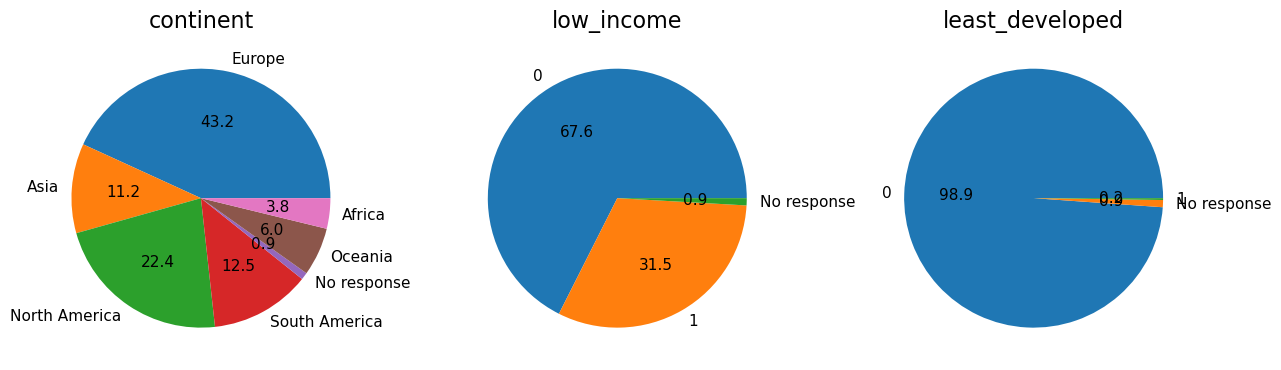

In [23]:
# geographical variables

geo = ['continent', 'low_income','least_developed']

#check counts for roles,fields, seniority, location

fig, axs = plt.subplots(1,3, figsize=(13,9))

for ax,column in zip(axs.flat,geo ):
    df[column].value_counts(sort=False).plot.pie(ax=ax, fontsize=11, autopct='%.1f')
    ax.set_title(column, fontsize = 16)
    ax.set_ylabel('')

fig.tight_layout()

number of taxonomists from na: 100


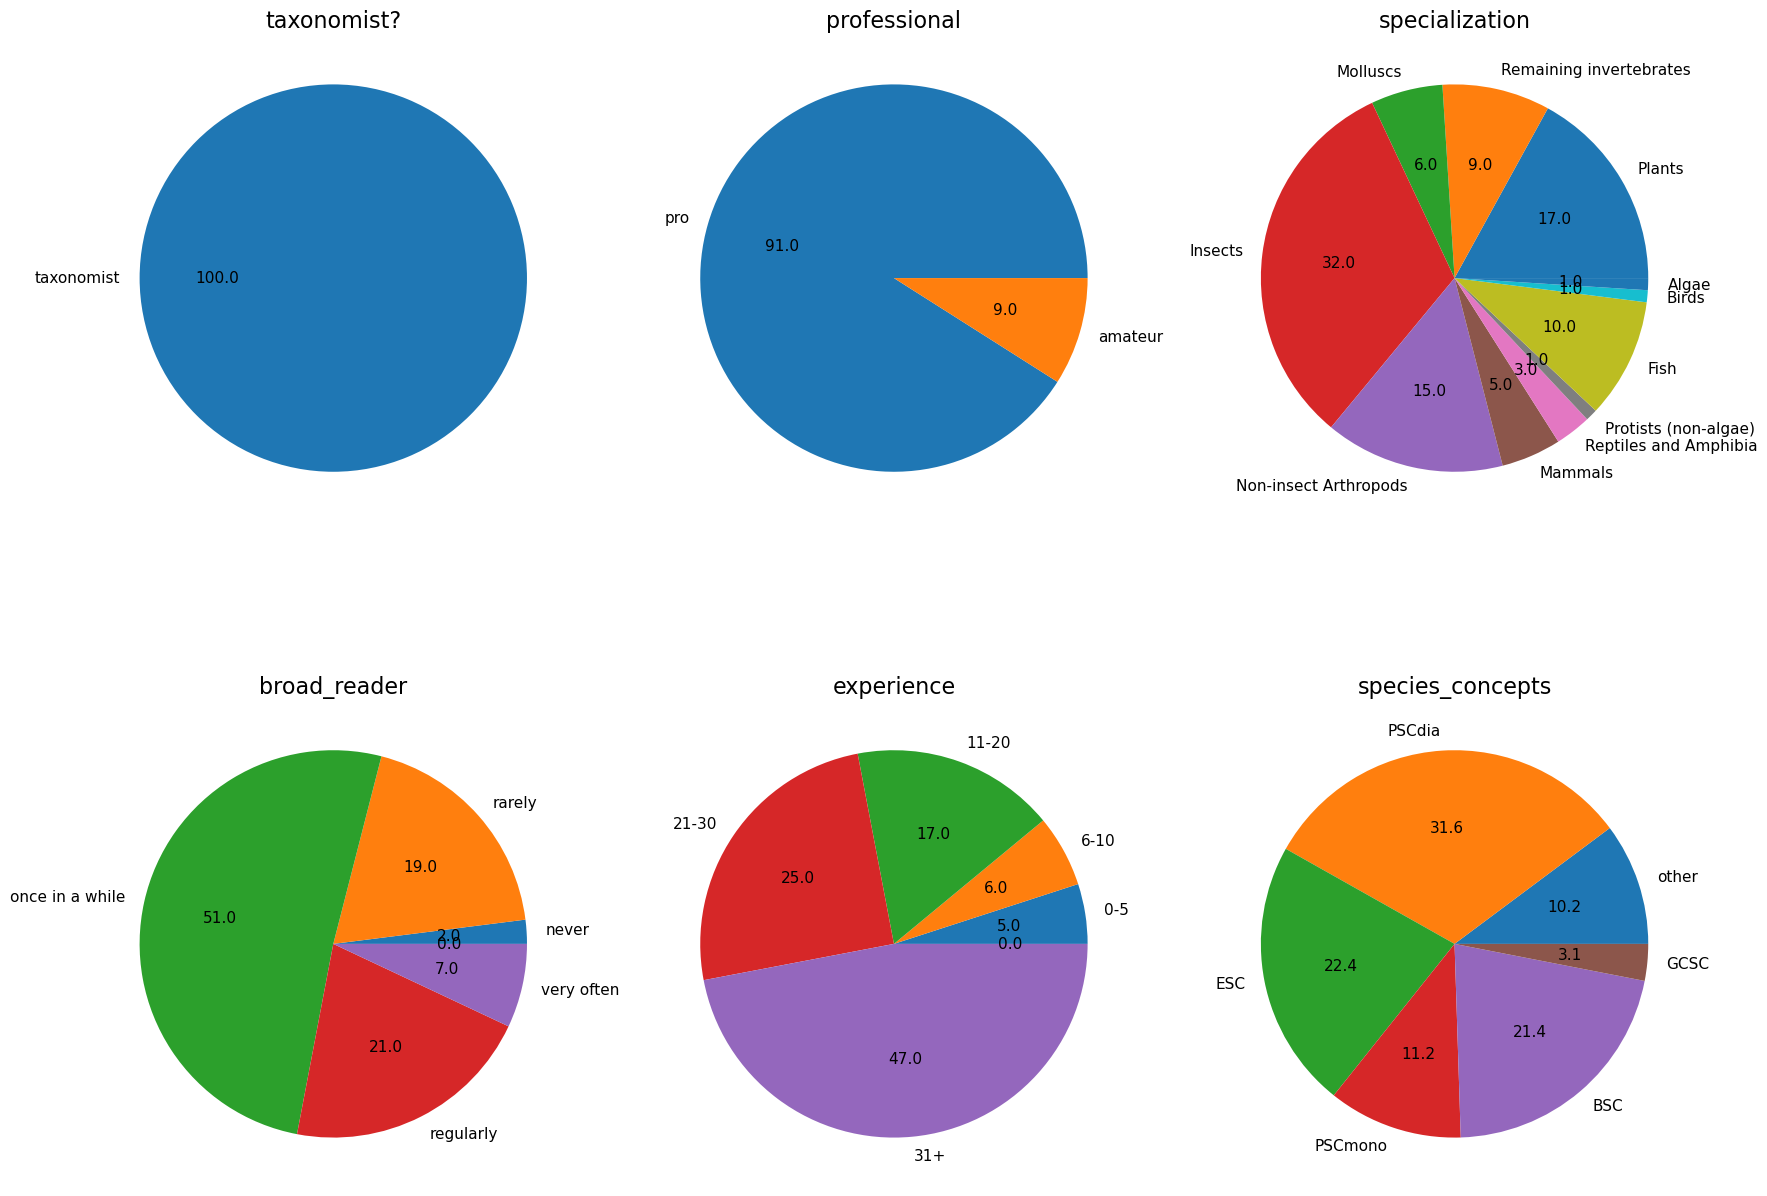

In [24]:
# check North America, as the distribution there seems a bit different (more older taxonomists)

na = df.loc[df.continent == 'North America'][demo].copy()
print(f'number of taxonomists from na: {len(na)}')

#check counts for roles,fields, seniority, location

fig, axs = plt.subplots(2,3, figsize=(18,14))

for ax,column in zip(axs.flat,demo):
    na[column].value_counts(sort=False).plot.pie(ax=ax, fontsize=11, autopct='%.1f')
    ax.set_title(column, fontsize = 16)
    ax.set_ylabel('')

fig.tight_layout()

In [1]:
# check demographics from low_income country participants

li = df.loc[df.low_income == 1][demo].copy()
print(f'number of taxonomists from low income countries: {len(li)}')

#check counts for roles,fields, seniority, location

fig, axs = plt.subplots(2,3, figsize=(18,14))

for ax,column in zip(axs.flat,demo):
    li[column].value_counts(sort=False).plot.bar(ax=ax, fontsize=11, autopct='%.1f')
    ax.set_title(column, fontsize = 16)
    ax.set_ylabel('')

fig.tight_layout()

## Crosstabs of demographic variables

In [ ]:
# species concept by the other demographic variables

fig, axs = plt.subplots(2,4, figsize = (18,10))

for ax, col in zip(axs.flat, demo[:-1] + [ 'low_income','continent']):
    
    pd.crosstab(index=df.species_concepts, columns = [df[col]], normalize = 'index').plot(kind = 'bar',stacked = True,ax = ax,fontsize = 15, cmap = 'Accent')
    ax.set_title(f' SC by {col}', fontsize = 15)
    ax.set_xlabel('')
axs[0,2].legend('')   
axs[1,3].set_visible(False)
axs[1,2].legend(bbox_to_anchor=(1, 1.05))
fig.tight_layout()

In [ ]:
# larger plot of species concept by specialization

fig, ax = plt.subplots(figsize = (20,7))

pd.crosstab(index=df['specialization'], columns = [df.species_concepts], normalize = 'index').plot(kind = 'bar',stacked = True,fontsize = 15, ax=ax,cmap = 'tab20')
ax.set_xlabel('')
plt.show()

In [ ]:
fig, axs = plt.subplots(2,4, figsize = (18,10), sharex = True)

for ax, col in zip(axs.flat, demo[:2]+demo[3:] + ['continent','low_income']):
    
    pd.crosstab(index=df.specialization, columns = [df[col]], normalize = 'index').plot(kind = 'bar',stacked = True,ax = ax,fontsize = 15, cmap = 'Accent')
    ax.set_title(f' specialzation by {col}', fontsize = 15)
    
axs[1,3].set_visible(False)

fig.tight_layout()

In [ ]:
#crosstab all demo vars

pd.crosstab(index= df.specialization, columns = [df['taxonomist?'],df.experience, df.broad_reader, df.professional, df.species_concepts])

In [ ]:
# crosstab of continent, experience and species concept

(pd.crosstab(index= df.experience, columns = [df.species_concepts, df.continent]))

In [ ]:
# crosstab of continent, experience and species concept

(pd.crosstab(index= df.low_income, columns = [df.specialization])).sum()

# Sample representative?

In [ ]:
# data from our other study

# get country codes from qualtrics, and make dcts to map
countries = pd.read_csv('...')
countries = countries.iloc[1:,:]
countries.code = countries.code.astype('float64')
mapqualtricscodes = dict(zip(countries.code,countries.country))

# fillna data other survey, restrict to taxonomists, and create columns with country and continent name

list_survey = list_survey.fillna('NAN')
list_survey = list_survey.loc[list_survey.tax_type.str.contains('1')]

list_survey['country2'] = list_survey.country.replace(mapqualtricscodes)

mapcontinents = dict(zip(countries.country, countries.Continent))
list_survey['continent'] = list_survey.country2.replace(mapcontinents)



In [ ]:
list_survey.continent.value_counts(normalize = True)